In [ ]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import skewnorm

# Degrees of Freedom

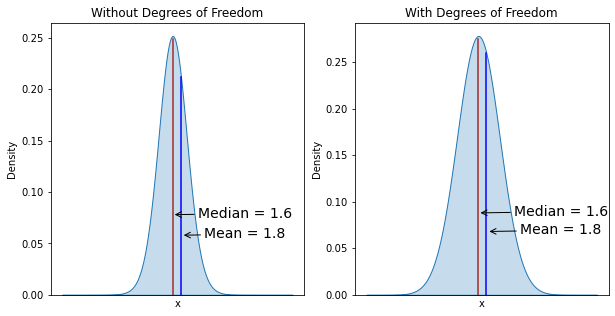

In [228]:
from scipy.stats import t
# x = t.rvs(df=8, size=100000)
# data = pd.DataFrame({'x':x})
# data.to_csv('./SkewnormData.csv', index=False)
data = pd.read_csv('./SkewnormData.csv')

# x = t.rvs(df=80, size=100000)
# data2 = pd.DataFrame({'x':x})
# data2.to_csv('./SkewnormData2.csv', index=False)
data2 = pd.read_csv('./SkewnormData2.csv')

fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].set_title('Without Degrees of Freedom')
ax[1].set_title('With Degrees of Freedom')

sns.kdeplot(data=data, x="x", fill=True, ax=ax[0], bw_adjust=10)
sns.kdeplot(data=data2, x="x", fill=True, ax=ax[1], bw_adjust=10)

ax[0].set_xticks([])
ax[1].set_xticks([])

ax[0].axvline(data['x'].median(), color='brown',ymin=0, ymax=0.94)
ax[0].annotate('Median = 1.6', xy=(data['x'].median(), 0.078),
            xytext=(data['x'].median()+2.8, 0.075),
            arrowprops=dict(arrowstyle='->',facecolor='black'), fontsize=14)

ax[0].axvline(0.9, color='blue',ymin=0, ymax=0.8)
ax[0].annotate('Mean = 1.8',
               xy=(1, 0.058),
               xytext=(3.5, 0.055),
            arrowprops=dict(arrowstyle='->',facecolor='black'), fontsize=14)


ax[1].axvline(data2['x'].median(), color='brown',ymin=0, ymax=0.94)
ax[1].annotate('Median = 1.6',
               xy=(data2['x'].median(), 0.088),
               xytext=(data2['x'].median()+2.4, 0.085),
               arrowprops=dict(arrowstyle='->',facecolor='black'), fontsize=14)

ax[1].axvline(0.5, color='blue',ymin=0, ymax=0.89)
ax[1].annotate('Mean = 1.8',    
               xy=(0.6, 0.068),
               xytext=(data2['x'].median()+2.8, 0.065),
               arrowprops=dict(arrowstyle='->',facecolor='black'), fontsize=14)

# plt.savefig('./Degrees of Freedom.png', dpi=300, facecolor='w', bbox_inches = "tight")

# Variance Assumption

The distributions do not have homogenous variance. P-value = 0.0000, F-statistic = 30.3979


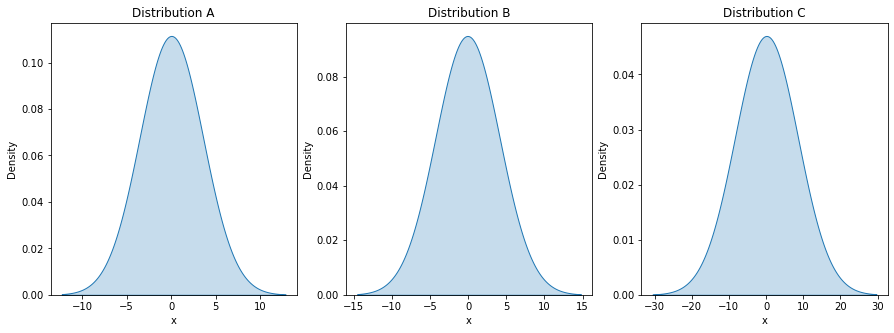

In [294]:
from scipy.stats import levene

np.random.seed(26)
mu1, sigma1 = 0, 0.9
mu2, sigma2 = 0, 1.1
mu3, sigma3 = 0, 2

distro1 = pd.DataFrame()
distro1['x'] = np.random.normal(mu1, sigma1, 100)

distro2 = pd.DataFrame()
distro2['x'] = np.random.normal(mu2, sigma2, 100)

distro3 = pd.DataFrame()
distro3['x'] = np.random.normal(mu3, sigma3, 100)

fig, ax = plt.subplots(1,3, figsize=(15,5))

ax[0].set_title('Distribution A')
ax[1].set_title('Distribution B')
ax[2].set_title('Distribution C')

sns.kdeplot(data=distro1, x="x", fill=True, ax=ax[0], bw_adjust=10)
sns.kdeplot(data=distro2, x="x", fill=True, ax=ax[1], bw_adjust=10)
sns.kdeplot(data=distro3, x="x", fill=True, ax=ax[2], bw_adjust=10)

f_statistic, p_value = levene(distro1['x'], distro2['x'], distro3['x'])
if p <= 0.05:
    print('The distributions do not have homogenous variance. P-value = %.4f, F-statistic = %.4f'%(p_value, f_statistic))
else:
    print('The distributions have homogenous variance. P-value = %.4f, F-statistic = %.4f'%(p_value, f_statistic))

plt.savefig('./Non-ConstantVar.png', dpi=300, facecolor='w', bbox_inches = "tight")

In [297]:
np.random.seed(26)
mu1, sigma1 = 0, 0.9
mu2, sigma2 = 0, 1.1
mu3, sigma3 = 0, 270

distro1 = pd.DataFrame()
distro1['x'] = np.random.normal(mu1, sigma1, 100)

distro2 = pd.DataFrame()
distro2['x'] = np.random.normal(mu2, sigma2, 100)

distro3 = pd.DataFrame()
distro3['x'] = np.random.normal(mu3, sigma3, 100)

from scipy.stats import f

def f_test(inputA, inputB):

    group1 = np.array(inputA)
    group2 = np.array(inputB)

    if np.var(group1) > np.var(group2):
        f_statistic = np.var(group1) / np.var(group2)
        
        numeratorDegreesOfFreedom = group1.shape[0] - 1
        denominatorDegreesOfFreedom = group2.shape[0] - 1
    else:
        f_statistic = np.var(group2)/np.var(group1)
        
        numeratorDegreesOfFreedom = group2.shape[0] - 1
        denominatorDegreesOfFreedom = group1.shape[0] - 1

    p_value = 1 - f.cdf(f_statistic, numeratorDegreesOfFreedom, denominatorDegreesOfFreedom)

    if p_value <= 0.05:
        print('The distributions do not have homogenous variance. P-value = %.4f, F-statistic = %.4f'%(p_value, f_statistic))
    else:
        print('The distributions have homogenous variance. P-value = %.4f, F-statistic = %.4f'%(p_value, f_statistic))

f_test(distro3['x'], distro1['x'])

The distributions do not have homogenous variance. P-value = 0.0000, F-statistic = 102622.9745


# Independence Assumption

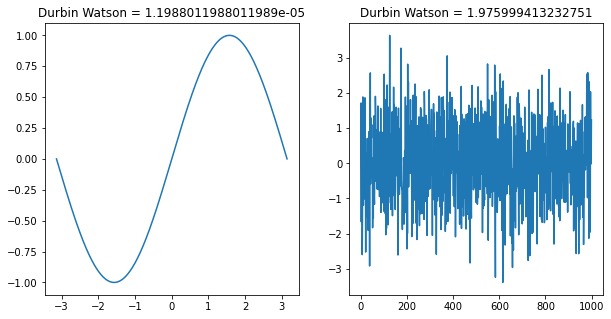

In [405]:
from statsmodels.stats.stattools import durbin_watson
import matplotlib.pyplot as plt
import numpy as np

mu, sigma = 0, 1.1
independent_samples = np.random.normal(mu, sigma, 1000)
correlated_samples = np.linspace(-np.pi, np.pi, num=1000)

fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].plot(correlated_samples, np.sin(correlated_samples))
ax[0].set_title('Durbin Watson = {}'.format(durbin_watson(correlated_samples)))

ax[1].plot(independent_samples)
ax[1].set_title('Durbin Watson = {}'.format(durbin_watson(independent_samples)))

plt.savefig('./Serial_Correlation.png', dpi=300, facecolor='w', bbox_inches = "tight")

# Normality Assumption

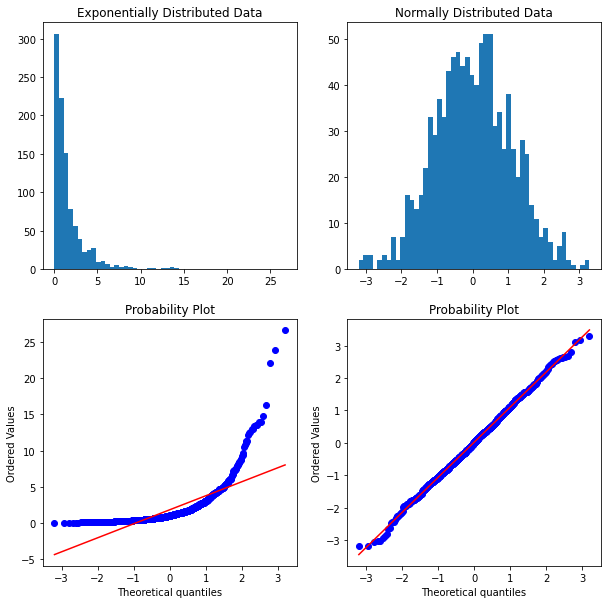

In [406]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

mu, sigma = 0, 1.1
normally_distributed = np.random.normal(mu, sigma, 1000)

fig, ax = plt.subplots(2,2, figsize=(10,10))

ax[0,0].set_title('Exponentially Distributed Data')
ax[0,1].set_title('Normally Distributed Data')

ax[0,0].hist(np.exp(normally_distributed), bins=50)
ax[0,1].hist(normally_distributed, bins=50)

stats.probplot(np.exp(normally_distributed), dist="norm", plot=ax[1,0])
stats.probplot(normally_distributed, dist="norm", plot=ax[1,1])
plt.savefig('./QQPlots.png', dpi=300, facecolor='w', bbox_inches = "tight")
plt.show()

In [362]:
mu, sigma = 0, 0.1
normally_distributed = np.random.normal(mu, sigma, 1000)

## Kolmogorov-Smirnov
This test requires data to be centered at 0 with unit variance.

''

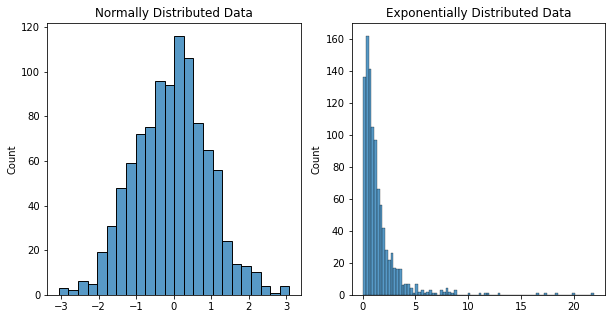

In [171]:
mu, sigma = 0, 1
normally_distributed = np.random.normal(mu, sigma, 1000)

fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].set_title('Normally Distributed Data')
ax[1].set_title('Exponentially Distributed Data')

sns.histplot(normally_distributed, ax=ax[0])
sns.histplot(np.exp(normally_distributed), ax=ax[1])
plt.savefig('./Norm_and_Exp_Distros_KS.png', dpi=300, facecolor='w', bbox_inches = "tight")
;

In [4]:
from scipy import stats
import numpy as np

mu, sigma = 0, 1
normally_distributed = np.random.normal(mu, sigma, 1000)

stats.kstest(normally_distributed,
             stats.norm.cdf)

KstestResult(statistic=0.0191570377833315, pvalue=0.849436919292824)

In [5]:
stats.kstest(np.exp(normally_distributed),
             stats.norm.cdf)

KstestResult(statistic=0.5375205782404135, pvalue=9.59979841227121e-271)

In [17]:
mu, sigma = 100, 2
normally_distributed = np.random.normal(mu, sigma, 1000)

normally_distributed_scaled = (normally_distributed-normally_distributed.mean())/normally_distributed.std()

In [18]:
stats.kstest(normally_distributed_scaled, stats.norm.cdf)

KstestResult(statistic=0.02597307287070466, pvalue=0.5016041053535877)

## Anderson-Darling

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

mu, sigma = 19, 1.7
normally_distributed = np.random.normal(mu, sigma, 1000)
not_normally_distributed = np.exp(normally_distributed)

fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].set_title('Normally Distributed')
ax[1].set_title('Exponentially Distributed')

sns.histplot(normally_distributed, ax=ax[0])
sns.histplot(not_normally_distributed, ax=ax[1])
# plt.savefig('./Norm_and_Exp_Distros.png', dpi=300, facecolor='w', bbox_inches = "tight")
;

In [22]:
from scipy import stats
import pandas as pd
import numpy as np

def anderson_test(data):
    data = np.array(data)

    test_statistic, critical_values, significance_levels = stats.anderson(normally_distributed,
                                                                          dist='norm')

    df_anderson = pd.DataFrame({'Test Statistic':np.repeat(test_statistic, len(critical_values)),
                                'Critical Value':critical_values,
                                'Significance Level': significance_levels})

    df_anderson.loc[df_anderson['Test Statistic'] >= df_anderson['Critical Value'], 'Normally Distributed'] = 'No'
    df_anderson.loc[df_anderson['Test Statistic'] < df_anderson['Critical Value'], 'Normally Distributed'] = 'Yes'
    
    return df_anderson;

mu, sigma = 193, 17
normally_distributed = np.random.normal(mu, sigma, 1000)

anderson_test(normally_distributed)

,Test Statistic,Critical Value,Significance Level,Normally Distributed
0,0.191482,0.574,15.0,Yes
1,0.191482,0.653,10.0,Yes
2,0.191482,0.784,5.0,Yes
3,0.191482,0.914,2.5,Yes
4,0.191482,1.088,1.0,Yes


In [ ]:
plt.hist(not_normally_distributed, bins=150)

In [156]:
mu, sigma = 19, 1.7
normally_distributed = np.random.normal(mu, sigma, 1000)
not_normally_distributed = np.exp(normally_distributed)
not_normal = anderson_test(not_normally_distributed)
not_normal

,Test Statistic,Critical Value,Significance Level,Normally Distributed
0,0.962774,0.574,15.0,No
1,0.962774,0.653,10.0,No
2,0.962774,0.784,5.0,No
3,0.962774,0.914,2.5,No
4,0.962774,1.088,1.0,Yes


# Shapiro-Wilk

In [166]:
mu, sigma = 19, 1.7
normally_distributed = np.random.normal(mu, sigma, 1000)

stats.shapiro(normally_distributed)

ShapiroResult(statistic=0.9993802905082703, pvalue=0.9900037050247192)

In [161]:
not_normally_distributed = np.exp(normally_distributed)

stats.shapiro(not_normally_distributed)

ShapiroResult(statistic=0.37320804595947266, pvalue=0.0)